## Dataset link : https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
# ! pip install -q kaggle

# from google.colab import files
# files.upload()
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri


mkdir: cannot create directory ‘/root/.kaggle’: File exists
 97% 84.0M/86.8M [00:01<00:00, 87.1MB/s]
100% 86.8M/86.8M [00:01<00:00, 80.6MB/s]


In [ ]:
! unzip brain-mri-images-for-brain-tumor-detectionn.zip -d /content/drive/MyDrive/Datasets

In [ ]:

!unzip brain-tumor-classification-mri

Archive:  brain-tumor-classification-mri.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg  
  infl

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Sequential
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

### **Loading the model**

In [ ]:
imageSize=[224,224]
train_path = '//content/Training'
test_path = '//content/Testing'

vgg = VGG16(input_shape=imageSize + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


**Adding Flatten layers**

In [ ]:
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
folders = glob('/content/Training/*')

In [ ]:
folders

['/content/Training/no_tumor',
 '/content/Training/meningioma_tumor',
 '/content/Training/glioma_tumor',
 '/content/Training/pituitary_tumor']

In [ ]:
x= Flatten()(vgg.output)

**Adding Output layer**

In [ ]:
prediction = Dense(len(folders),activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

**Model summary**

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

**configure the learning process**

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'], run_eagerly=True
)

**Data Augmentation and Loading**

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./225,
                                   shear_range = 0.2,
                                   zoom_range =0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./225)



**Apply ImageDataGenerator functionality to Trainset and Testset**

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 2,
                                                 class_mode = 'categorical')


Found 2870 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=2,
                                            class_mode ='categorical')

Found 394 images belonging to 4 classes.


**Train the Model**

In [ ]:
import sys
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=100,
    steps_per_epoch = len(training_set)//15,
    validation_steps = len(test_set)//15
)

Epoch 1/100


<ipython-input-21-a041fa9d0c72>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


95/95 [==============================] - 14s 77ms/step - loss: 1.7980 - accuracy: 0.5632 - val_loss: 2.4635 - val_accuracy: 0.4231
Epoch 2/100
95/95 [==============================] - 8s 87ms/step - loss: 1.1929 - accuracy: 0.6316 - val_loss: 2.3074 - val_accuracy: 0.4231
Epoch 3/100
95/95 [==============================] - 8s 84ms/step - loss: 1.0286 - accuracy: 0.7263 - val_loss: 2.2396 - val_accuracy: 0.5000
Epoch 4/100
95/95 [==============================] - 7s 73ms/step - loss: 1.4668 - accuracy: 0.6684 - val_loss: 4.5154 - val_accuracy: 0.2692
Epoch 5/100
95/95 [==============================] - 8s 80ms/step - loss: 1.5548 - accuracy: 0.6632 - val_loss: 1.5629 - val_accuracy: 0.5000
Epoch 6/100
95/95 [==============================] - 8s 86ms/step - loss: 0.8996 - accuracy: 0.7632 - val_loss: 2.3029 - val_accuracy: 0.5769
Epoch 7/100
95/95 [==============================] - 7s 74ms/step - loss: 1.1201 - accuracy: 0.7211 - val_loss: 3.1595 - val_accuracy: 0.6154
Epoch 8/100
95/95

In [ ]:
 import matplotlib.pyplot as plt


**Train loss**

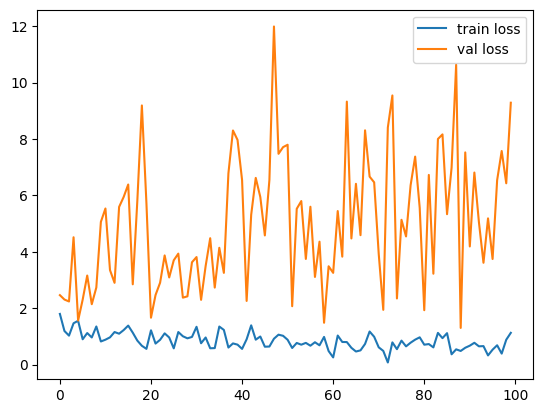

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot the loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



**Train accuracy**

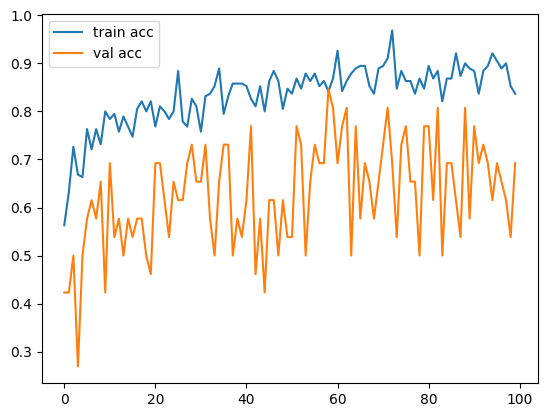

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot the accuracy
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

**save the model**

In [ ]:
from tensorflow.keras.models import load_model

model.save('brain_vgg16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
